# Pyhector Usage Examples

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 16, 9

In [3]:
import pyhector
from pyhector import rcp26, rcp45, rcp60, rcp85

In [4]:
pyhector.__version__

'0.6.0+6.g74f6c9c.dirty'

## Scenarios

The four RCP scenarios are already preloaded as DataFrames in `pyhector`. 
They contain the following emissions:

In [5]:
rcp26.columns

Index(['anthroEmissions', 'lucEmissions', 'CH4_emissions', 'N2O_emissions',
       'SO2_emissions', 'CO_emissions', 'NMVOC_emissions', 'NOX_emissions',
       'BC_emissions', 'OC_emissions', 'CF4_emissions', 'C2F6_emissions',
       'HFC23_emissions', 'HFC32_emissions', 'HFC4310_emissions',
       'HFC125_emissions', 'HFC134a_emissions', 'HFC143a_emissions',
       'HFC227ea_emissions', 'HFC245fa_emissions', 'SF6_emissions',
       'CFC11_emissions', 'CFC12_emissions', 'CFC113_emissions',
       'CFC114_emissions', 'CFC115_emissions', 'CCl4_emissions',
       'CH3CCl3_emissions', 'HCF22_emissions', 'HCF141b_emissions',
       'HCF142b_emissions', 'halon1211_emissions', 'halon1301_emissions',
       'halon2402_emissions', 'CH3Br_emissions', 'CH3Cl_emissions'],
      dtype='object')

In [6]:
rcp26.head()

,anthroEmissions,lucEmissions,CH4_emissions,N2O_emissions,SO2_emissions,CO_emissions,NMVOC_emissions,NOX_emissions,BC_emissions,OC_emissions,...,CCl4_emissions,CH3CCl3_emissions,HCF22_emissions,HCF141b_emissions,HCF142b_emissions,halon1211_emissions,halon1301_emissions,halon2402_emissions,CH3Br_emissions,CH3Cl_emissions
Date,,,,,,,,,,,,,,,,,,,,,
1765,0.003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.267,3100.211
1766,0.003,0.005338,1.963262,0.005191,98.882647,9.050221,1.596875,0.109502,0.106998,0.565920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.267,3100.211
1767,0.003,0.010677,2.436448,0.010117,116.306500,12.960844,2.292316,0.168038,0.133383,0.781468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.267,3100.211
1768,0.003,0.016015,2.911105,0.015043,133.810750,16.876539,2.988648,0.226625,0.159847,0.997361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.267,3100.211
1769,0.003,0.021353,3.387278,0.019969,151.397890,20.797465,3.685897,0.285264,0.186393,1.213611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157.267,3100.211


The units can also be looked up.

In [7]:
pyhector.units

{'BC_emissions': 'Mt/yr',
 'C2F6_emissions': 'kt/yr',
 'CCl4_emissions': 'kt/yr',
 'CF4_emissions': 'kt/yr',
 'CFC113_emissions': 'kt/yr',
 'CFC114_emissions': 'kt/yr',
 'CFC115_emissions': 'kt/yr',
 'CFC11_emissions': 'kt/yr',
 'CFC12_emissions': 'kt/yr',
 'CH3Br_emissions': 'kt/yr',
 'CH3CCl3_emissions': 'kt/yr',
 'CH3Cl_emissions': 'kt/yr',
 'CH4_emissions': 'MtCH4/yr',
 'CO_emissions': 'MtCO/yr',
 'HCF141b_emissions': 'kt/yr',
 'HCF142b_emissions': 'kt/yr',
 'HCF22_emissions': 'kt/yr',
 'HFC125_emissions': 'kt/yr',
 'HFC134a_emissions': 'kt/yr',
 'HFC143a_emissions': 'kt/yr',
 'HFC227ea_emissions': 'kt/yr',
 'HFC23_emissions': 'kt/yr',
 'HFC245fa_emissions': 'kt/yr',
 'HFC32_emissions': 'kt/yr',
 'HFC4310_emissions': 'kt/yr',
 'N2O_emissions': 'MtN2O-N/yr',
 'NMVOC_emissions': 'Mt/yr',
 'NOX_emissions': 'MtN/yr',
 'OC_emissions': 'Mt/yr',
 'SF6_emissions': 'kt/yr',
 'SO2_emissions': 'Gg/yr',
 'anthroEmissions': 'GtC/yr',
 'halon1211_emissions': 'kt/yr',
 'halon1301_emissions': 'kt/

A plot of four categories in RCP 2.6.

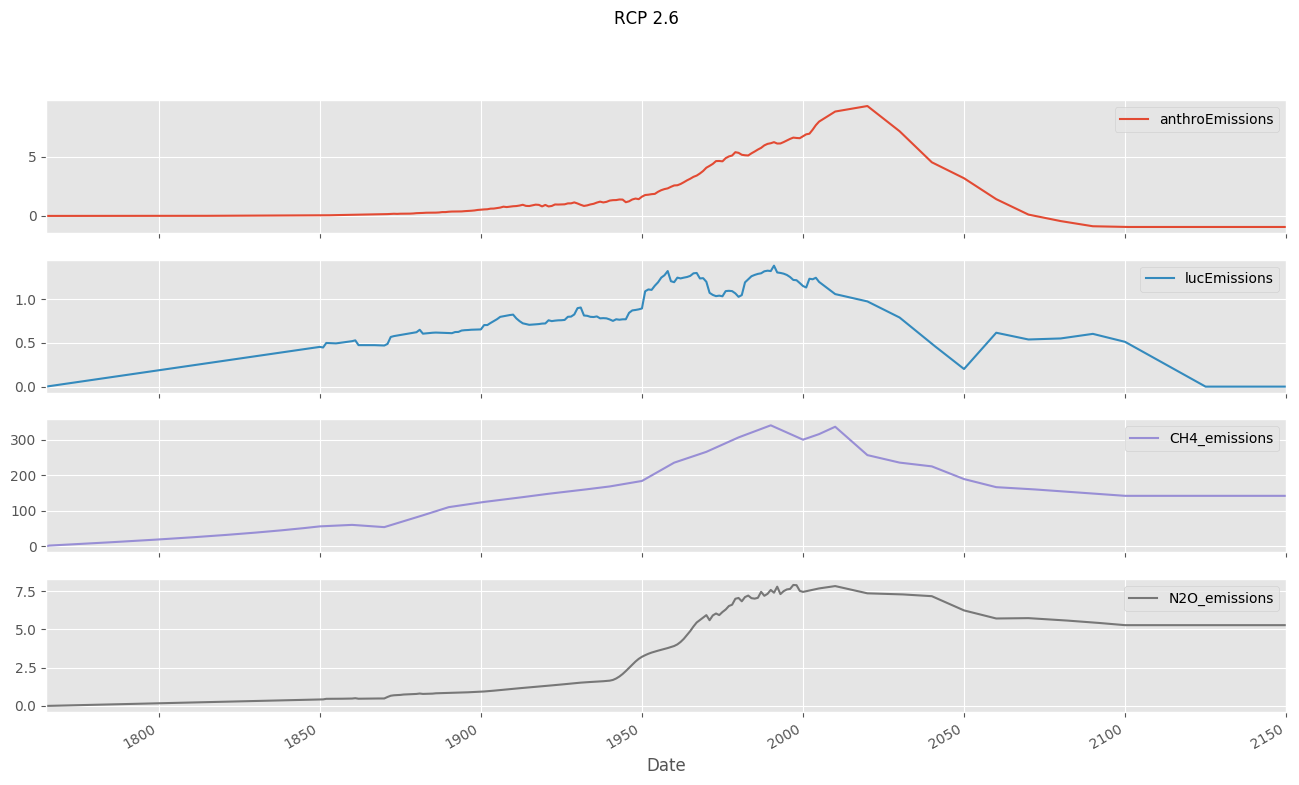

In [8]:
emissions = ["anthroEmissions", "lucEmissions", "CH4_emissions", "N2O_emissions"]
rcp26[emissions].loc[:2150].plot(subplots=True);
plt.suptitle("RCP 2.6");

## Running Hector
A single Hector run doesn't take much time and returns a DataFrame with results as well the used parameters:

In [9]:
%time results = pyhector.run(rcp26)

CPU times: user 211 ms, sys: 7.8 ms, total: 219 ms
Wall time: 225 ms


By default `pyhector` uses the [default parameters](https://github.com/JGCRI/hector/blob/master/input/hector_rcp26.ini) from the INI files for the RCP runs in the Hector repository.

In [10]:
pyhector._default_config

{'C2F6_halocarbon': {'molarMass': 138.01, 'rho': 0.00026, 'tau': 10000.0},
 'CCl4_halocarbon': {'molarMass': 153.8, 'rho': 0.00013, 'tau': 26.0},
 'CF4_halocarbon': {'H0': (35.0, 'pptv'),
  'molarMass': 88.0043,
  'rho': 8e-05,
  'tau': 50000.0},
 'CFC113_halocarbon': {'molarMass': 187.35, 'rho': 0.0003, 'tau': 85.0},
 'CFC114_halocarbon': {'molarMass': 170.9, 'rho': 0.00031, 'tau': 300},
 'CFC115_halocarbon': {'molarMass': 154.45, 'rho': 0.00018, 'tau': 1700},
 'CFC11_halocarbon': {'molarMass': 137.35, 'rho': 0.00025, 'tau': 45.0},
 'CFC12_halocarbon': {'molarMass': 120.9, 'rho': 0.00032, 'tau': 100},
 'CH3Br_halocarbon': {'H0': 5.8, 'molarMass': 94.9, 'rho': 1e-05, 'tau': 0.7},
 'CH3CCl3_halocarbon': {'molarMass': 133.35, 'rho': 6e-05, 'tau': 5.0},
 'CH3Cl_halocarbon': {'H0': 504.0,
  'molarMass': 50.45,
  'rho': 1e-05,
  'tau': 1.3},
 'CH4': {'CH4N': 300, 'M0': 653, 'Tsoil': 160, 'Tstrat': 120, 'UC_CH4': 2.78},
 'HCF141b_halocarbon': {'molarMass': 116.9, 'rho': 0.00014, 'tau': 9.3},

## RCP comparisons

In [11]:
rcps = [rcp26, rcp45, rcp60, rcp85]

# For Hector output variables we need to address them as 
# 'component.variable', to simplify this we define short cuts
SURFACE_TEMP = "temperature.Tgav"
CONCENTRATION_CO2 = "simpleNbox.Ca"
FORCING = "forcing.Ftot"

Let's plot the default output variables for the four RCPs:

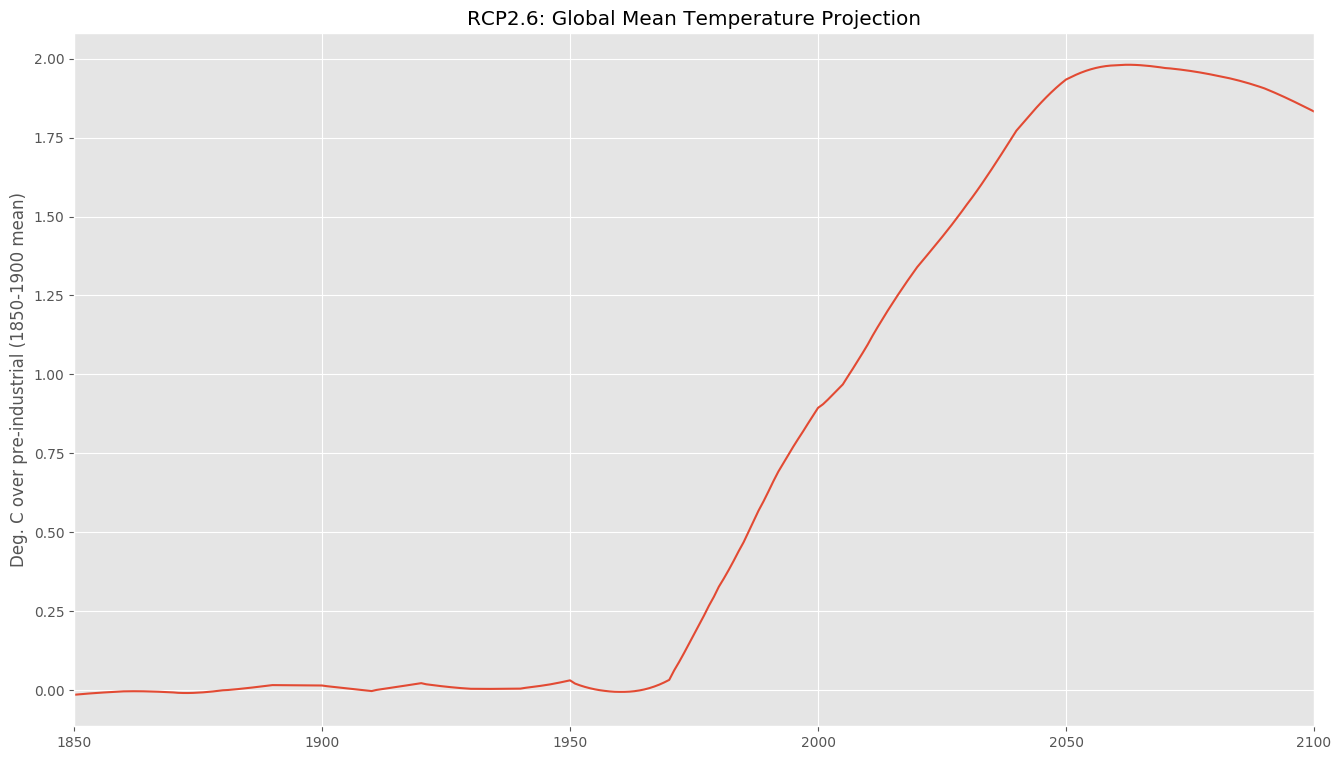

In [12]:
temp = results[SURFACE_TEMP].loc[1850:2100] - results[SURFACE_TEMP].loc[1850:1900].mean()
temp.plot()
plt.title("RCP2.6: Global Mean Temperature Projection")
plt.ylabel("Deg. C over pre-industrial (1850-1900 mean)");

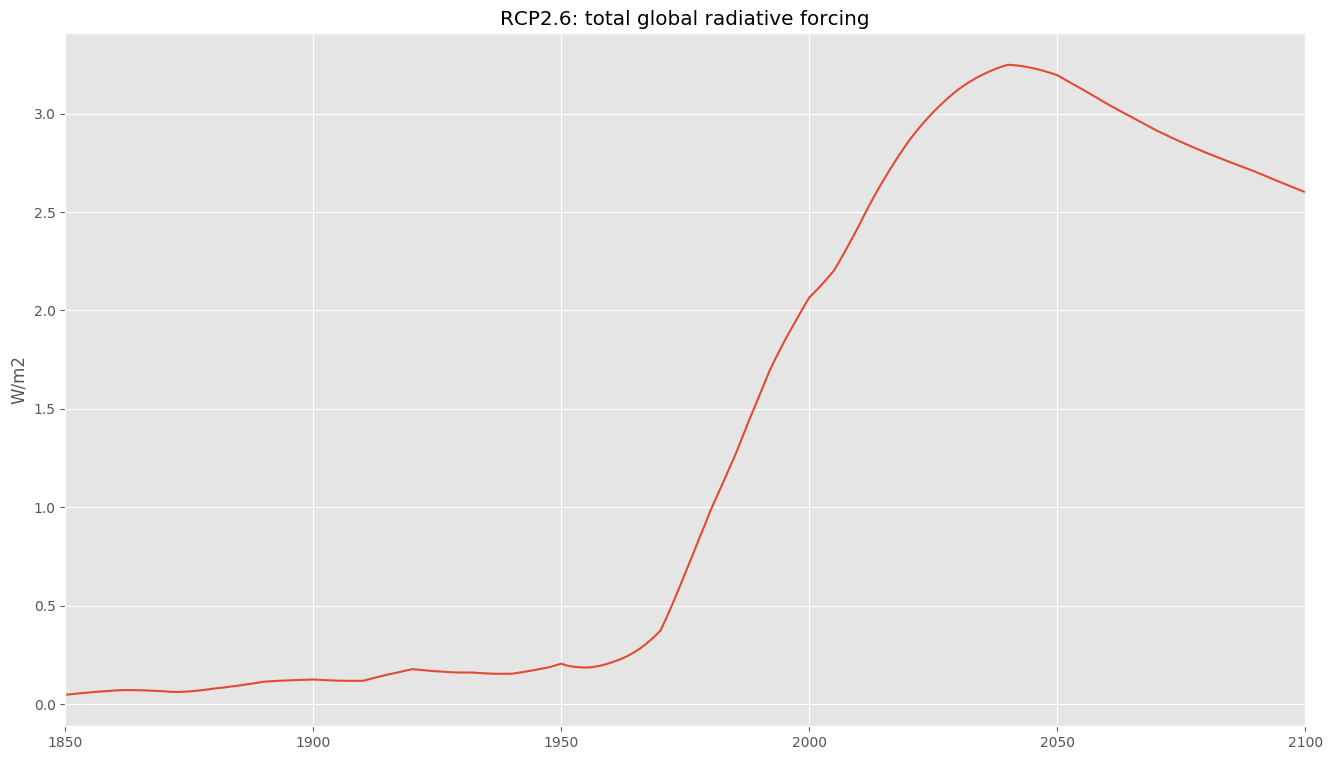

In [13]:
results[FORCING].loc[1850:2100].plot()
plt.title("RCP2.6: " + pyhector.variables[FORCING]["description"])
plt.ylabel(pyhector.variables[FORCING]["unit"]);

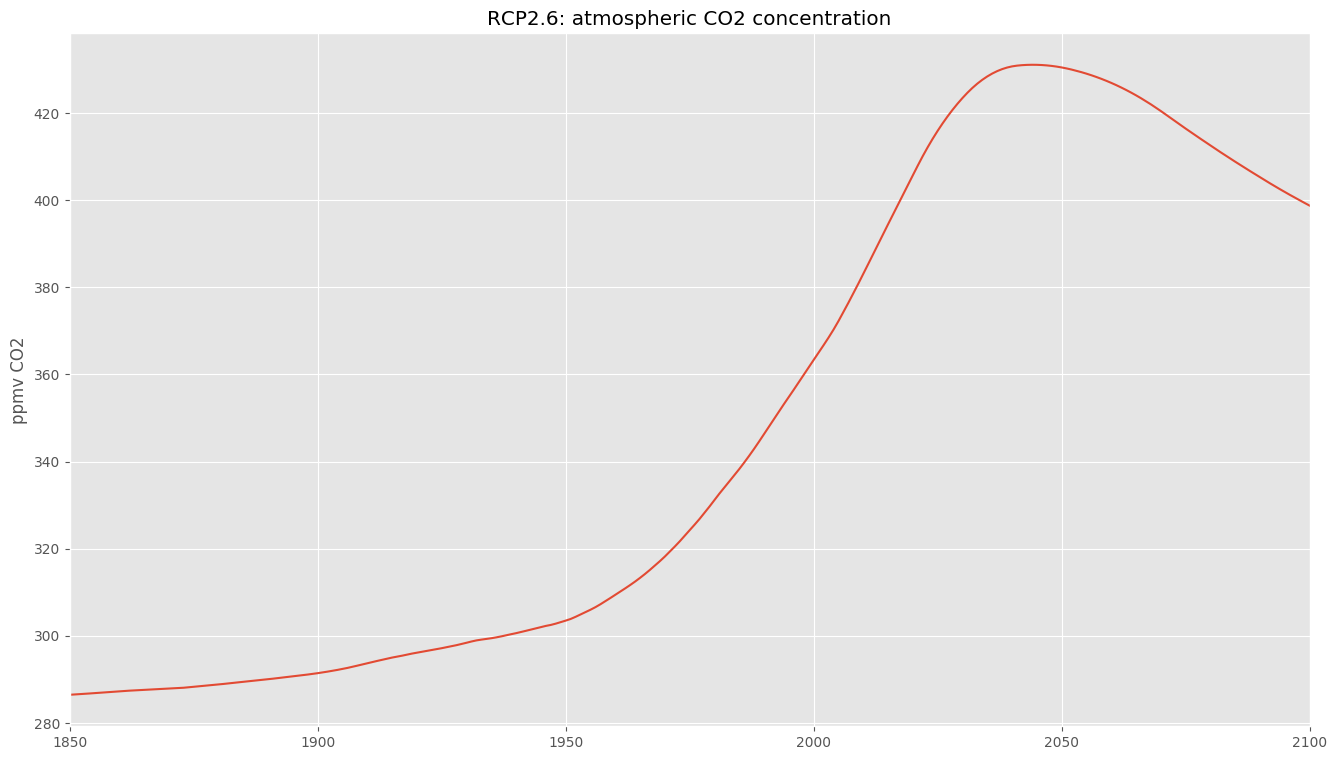

In [14]:
results[CONCENTRATION_CO2].loc[1850:2100].plot()
plt.title("RCP2.6: " + pyhector.variables[CONCENTRATION_CO2]["description"])
plt.ylabel(pyhector.variables[CONCENTRATION_CO2]["unit"]);

A comparison of global mean temperature for the four RCPs.

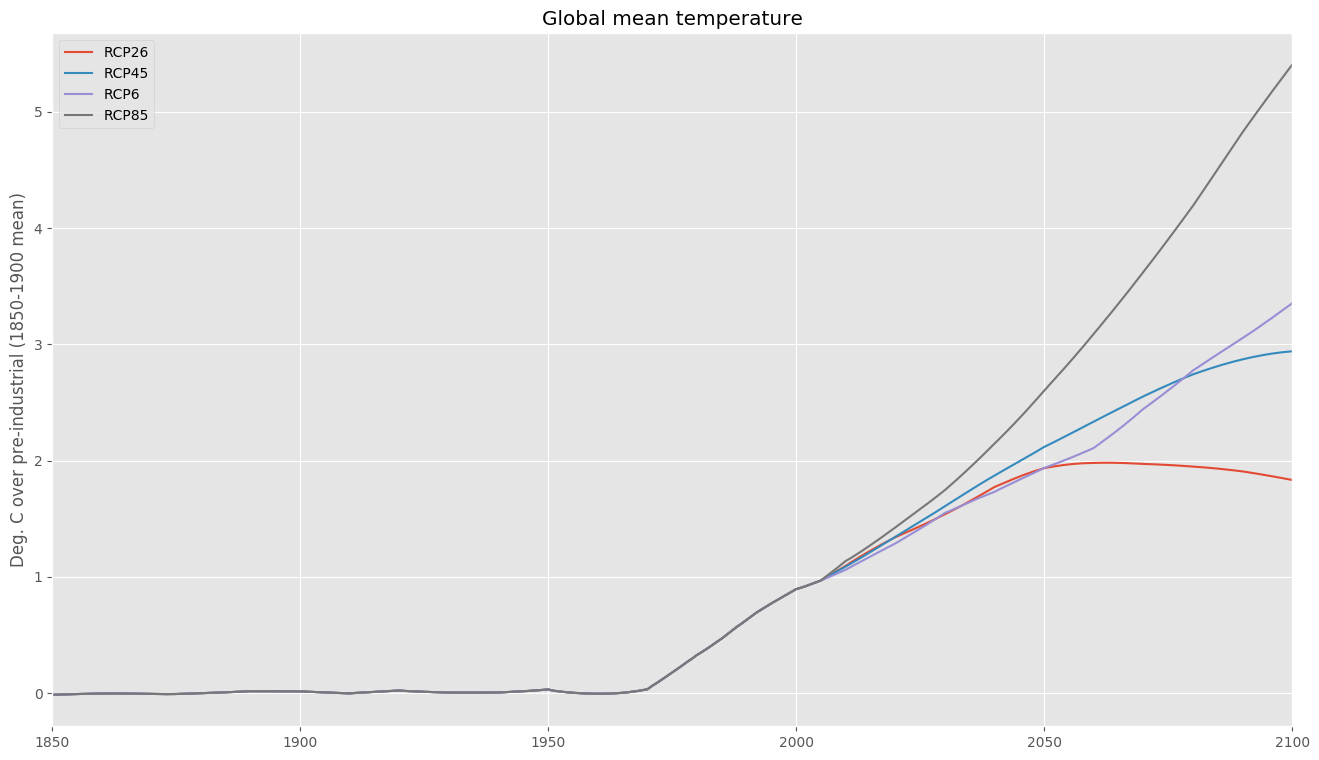

In [15]:
for rcp in rcps:
    output = pyhector.run(rcp, {"core": {"endDate": 2100}})
    temp = output[SURFACE_TEMP]
    temp = temp.loc[1850:] - temp.loc[1850:1900].mean()
    temp.plot(label=rcp.name.split("_")[0])
plt.title("Global mean temperature")
plt.ylabel("Deg. C over pre-industrial (1850-1900 mean)")
plt.legend(loc="best");

## Setting parameters

Let's change an input parameter and, as an example, change the equilibrium climate sensitivity.

In [16]:
low = pyhector.run(rcp45, {"temperature": {"S": 1.5}})
default = pyhector.run(rcp45, {"temperature": {"S": 3}})
high = pyhector.run(rcp45, {"temperature": {"S": 4.5}})

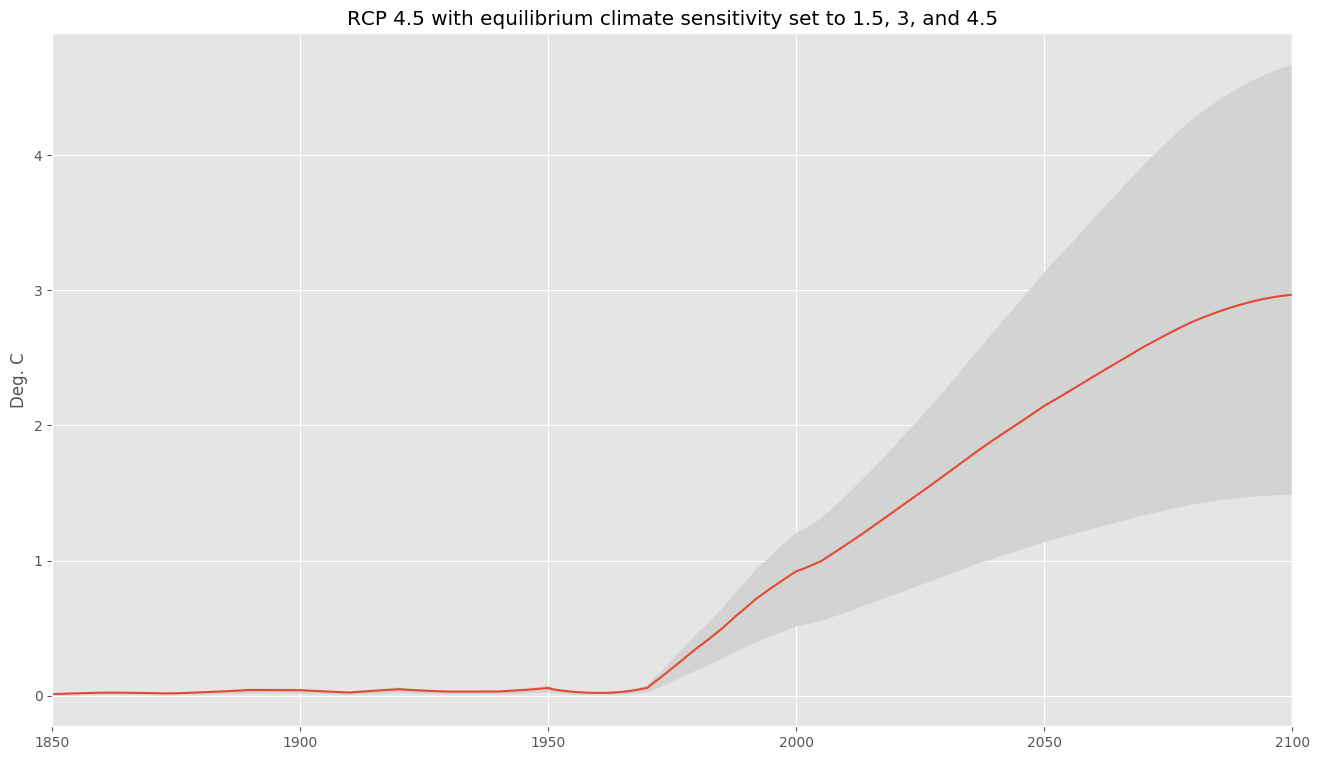

In [17]:
sel = slice(1850, 2100)
plt.fill_between(low[SURFACE_TEMP].loc[sel].index,
                 low[SURFACE_TEMP].loc[sel],
                 high[SURFACE_TEMP].loc[sel],
                 color="lightgray")
default[SURFACE_TEMP].loc[sel].plot()
plt.title("RCP 4.5 with equilibrium climate sensitivity set to 1.5, 3, and 4.5")
plt.ylabel("Deg. C");